# Eigen Values and Eigenvectors

## Motivation

When a linear transformation is applied to a vector, the vector usually changes both its direction and magnitude.

However, there are special vectors for whom the transformation acts such that their direction is preserved, and only the magnitude changes.

These special directions are called eigenvectors, and the corresponding scaling factors are called eigenvalues.


## Intuition : Invariant directions

Consider a linear transformation denoted by a matrix $A$

When the matrix is stretched, sheared or rotated into new basis,<br> some vectors stay in the same direction, with only their magnitude changing.

Moreover they can either grow, shrink or flip along origin.


## Definition

A vector $\mathbf{v}$ is called the eigen vector if on applying a linear transformation $A$,<br>
It scales by a scaling factor $\lambda$, equating to $\lambda\mathbf{v}$

This scaling factor $\lambda$ is called an eigenvalue corresponding to vector $\mathbf{v}$ .

## A Simple Example

Consider the linear transformation represented by the matrix

$A =
\begin{bmatrix}
2 & 0 \\
0 & 1
\end{bmatrix}$.

This transformation stretches vectors in the $x$-direction by a factor of $2$ while leaving the $y$-direction unchanged.

We now ask: are there directions that remain unchanged under this transformation?


## Eigenvectors by Inspection

Applying $A$ to the vector $\mathbf{e}_1 = \begin{bmatrix}1 \\ 0\end{bmatrix}$
gives:

$A\mathbf{e}_1 =
\begin{bmatrix}
2 \\ 0
\end{bmatrix}
= 2\mathbf{e}_1$.

Thus, $\mathbf{e}_1$ is an eigenvector with eigenvalue $\lambda = 2$.

Similarly, applying $A$ to $\mathbf{e}_2 = \begin{bmatrix}0 \\ 1\end{bmatrix}$
gives:

$A\mathbf{e}_2 =
\begin{bmatrix}
0 \\ 1
\end{bmatrix}
= 1\mathbf{e}_2$.

Hence, $\mathbf{e}_2$ is an eigenvector with eigenvalue $\lambda = 1$.


## Geometric Interpretation

For this transformation, the coordinate axes themselves are invariant directions.
 
Vectors lying along the $x$-axis are stretched but not rotated, while vectors lying along the $y$-axis remain unchanged.

These invariant directions correspond to the eigenvectors of the transformation, <br>
and the stretching factors correspond to the eigenvalues.


## Visualising Eigen Vectors

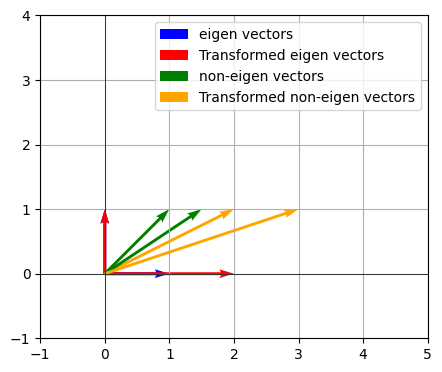

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Transformation matrix
A = np.array([
    [2, 0],
    [0, 1]
])

# Eigenvectors (along axes)
eigen_vectors = np.array([
    [1, 0],
    [0, 1]
])

# Non-eigenvectors
other_vectors = np.array([
    [1, 1],
    [1.5, 1]
])

# Apply transformation
eig_transformed = eigen_vectors @ A.T
other_transformed = other_vectors @ A.T

plt.figure(figsize=(5, 5))

# Plot eigenvectors (blue) and their images (red)
for v, vt in zip(eigen_vectors, eig_transformed):
    plt.quiver(0, 0, v[0], v[1], color='blue',
               angles='xy', scale_units='xy', scale=1)
    plt.quiver(0, 0, vt[0], vt[1], color='red',
               angles='xy', scale_units='xy', scale=1)

# Plot non-eigenvectors (green) and their images (orange)
for v, vt in zip(other_vectors, other_transformed):
    plt.quiver(0, 0, v[0], v[1], color='green',
               angles='xy', scale_units='xy', scale=1)
    plt.quiver(0, 0, vt[0], vt[1], color='orange',
               angles='xy', scale_units='xy', scale=1)

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.xlim(-1, 5)
plt.ylim(-1, 4)
plt.quiver([], [], [], [], color='blue', label='eigen vectors')
plt.quiver([], [], [], [], color='red', label='Transformed eigen vectors')
plt.quiver([], [], [], [], color='green', label='non-eigen vectors')
plt.quiver([], [], [], [], color='orange', label='Transformed non-eigen vectors')


plt.legend()
plt.show()


The plot distinguishes eigenvectors from non-eigenvectors and shows how only eigenvectors preserve direction under the transformation.


## A Rotation with No Real Eigenvectors

So far, we have seen transformations that stretch space along fixed directions.

Now consider a rotation in the plane. Intuitively, a rotation changes the direction of every nonzero vector.

We ask the same question as before:
are there any nonzero vectors whose direction is preserved under a rotation?


Consider a rotation by $90^\circ$ counterclockwise, represented by the
matrix

$A =
\begin{bmatrix}
0 & -1 \\
1 & \phantom{-}0
\end{bmatrix}$.


## Visualising the rotation

c:\Users\aksha\ml-theory\.venv\Lib\site-packages\matplotlib\quiver.py:678: RuntimeWarning: Mean of empty slice
  amean = a.mean()
c:\Users\aksha\ml-theory\.venv\Lib\site-packages\numpy\_core\_methods.py:142: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


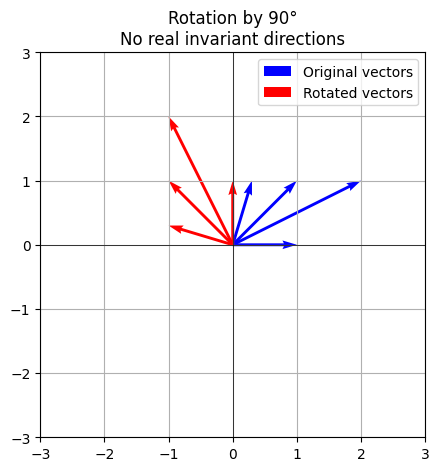

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Rotation by 90 degrees
A = np.array([
    [0, -1],
    [1,  0]
])

vectors = np.array([
    [1, 0],
    [0.3, 1],
    [1, 1],
    [2, 1]
])

transformed = vectors @ A.T

plt.figure(figsize=(5, 5))

# Original vectors
for v in vectors:
    plt.quiver(0, 0, v[0], v[1],
               color='blue',
               angles='xy', scale_units='xy', scale=1)

# Rotated vectors
for vt in transformed:
    plt.quiver(0, 0, vt[0], vt[1],
               color='red',
               angles='xy', scale_units='xy', scale=1)

plt.quiver([], [], [], [], color='blue', label='Original vectors')
plt.quiver([], [], [], [], color='red', label='Rotated vectors')
plt.legend()

plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title("Rotation by 90°\nNo real invariant directions")
plt.show()


Under a $90^\circ$ rotation, every nonzero vector changes its direction.

There is no real vector $\mathbf{v} \neq \mathbf{0}$ such that $A\mathbf{v} = \lambda \mathbf{v}$ for a real scalar $\lambda$.

Thus, this transformation has no real eigenvectors.

This example shows that the existence of eigenvectors depends on the
underlying number system,<br> motivating the introduction of complex
eigenvalues.



## From Geometry to an Equation

By definition, an eigenvector $\mathbf{v} \neq \mathbf{0}$ satisfies

$A\mathbf{v} = \lambda \mathbf{v}$.

Rewriting this equation gives

$A\mathbf{v} - \lambda \mathbf{v} = \mathbf{0}$,

or equivalently,

$(A - \lambda I)\mathbf{v} = \mathbf{0}$,

where $I$ is the identity matrix.


## Why the Determinant Must Vanish

The equation $(A - \lambda I)\mathbf{v} = \mathbf{0}$ has a nonzero solution if and only if the matrix $(A - \lambda I)$ is singular.

A matrix is singular precisely when its determinant is zero.

Therefore, eigenvalues must satisfy the condition:

$\det(A - \lambda I) = 0$.


## The Characteristic Equation

The equation

$\det(A - \lambda I) = 0$

is called the characteristic equation of the matrix $A$.<br>
This method is called the Cyaley-Hamilton theorem.

Solving this equation yields the eigenvalues of $A$.


### Intuitive way of finding eigen values

We notice that eigen vector is one that doesn't change its direction.<br>
This could also be seen as the linear transformation transforms all the vectors into the eigen direction.

we can visualise these as the slope of the 2 basis vectors becoming the same.


## Solving a 2×2 Eigenvalue Problem

Consider the matrix

$A =
\begin{bmatrix}
2 & 0 \\
0 & 1
\end{bmatrix}$.

To find its eigenvalues, we solve the characteristic equation

$\det(A - \lambda I) = 0$.


We compute

$A - \lambda I =
\begin{bmatrix}
2 - \lambda & 0 \\
0 & 1 - \lambda
\end{bmatrix}$.

The determinant is

$\det(A - \lambda I) = (2 - \lambda)(1 - \lambda)$.

Setting this equal to zero gives the eigenvalues:

$\lambda_1 = 2, \quad \lambda_2 = 1$.


To find the eigenvectors, we solve $(A - \lambda I)\mathbf{v} = \mathbf{0}$
for each eigenvalue.

For $\lambda = 2$:

$(A - 2I)\mathbf{v} =
\begin{bmatrix}
0 & 0 \\
0 & -1
\end{bmatrix}\mathbf{v} = \mathbf{0}$,

which implies $v_2 = 0$.
Thus, any nonzero vector of the form

$\mathbf{v} = \begin{bmatrix}1 \\ 0\end{bmatrix}$

is an eigenvector corresponding to $\lambda = 2$.

For $\lambda = 1$:

$(A - I)\mathbf{v} =
\begin{bmatrix}
1 & 0 \\
0 & 0
\end{bmatrix}\mathbf{v} = \mathbf{0}$,

which implies $v_1 = 0$.
Thus, any nonzero vector of the form

$\mathbf{v} = \begin{bmatrix}0 \\ 1\end{bmatrix}$

is an eigenvector corresponding to $\lambda = 1$.


## Interpretation

The eigenvectors correspond exactly to the invariant directions of the transformation.

The eigenvalues indicate how much vectors along those directions are scaled.

This confirms the geometric interpretation developed earlier.


## Summary

Eigenvectors are directions that remain invariant under a linear
transformation, while eigenvalues describe how those directions are
scaled.

Geometric intuition and algebraic conditions together explain when
eigenvectors exist and how they can be computed.
